In [ ]:
import pandas as pd

# Load the dataset (replace with correct path if needed)
df = pd.read_csv('adult_with_headers.csv')

# Display the first few rows
print(df.head())

# Basic data exploration
print(df.info())  # Data types and non-null counts
print(df.describe())  # Summary statistics for numerical columns

# Check for missing values
print(df.isnull().sum())


   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [ ]:
# Impute missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Impute missing values for numerical columns with the median
numerical_cols = df.select_dtypes(exclude=['object']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Verify that there are no missing values
print(df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Separate numerical columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

# Standard Scaling
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])

# Display the scaled dataset
print(df.head())


        age          workclass    fnlwgt   education  education_num  \
0  0.301370          State-gov  0.044302   Bachelors       0.800000   
1  0.452055   Self-emp-not-inc  0.048238   Bachelors       0.800000   
2  0.287671            Private  0.138113     HS-grad       0.533333   
3  0.493151            Private  0.151068        11th       0.400000   
4  0.150685            Private  0.221488   Bachelors       0.800000   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0       0.02174           

In [ ]:
# One-Hot Encoding for categorical columns with fewer than 5 unique categories
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].nunique() <= 5:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Display the new DataFrame
print(df.head())


        age          workclass    fnlwgt   education  education_num  \
0  0.301370          State-gov  0.044302   Bachelors       0.800000   
1  0.452055   Self-emp-not-inc  0.048238   Bachelors       0.800000   
2  0.287671            Private  0.138113     HS-grad       0.533333   
3  0.493151            Private  0.151068        11th       0.400000   
4  0.150685            Private  0.221488   Bachelors       0.800000   

        marital_status          occupation    relationship  capital_gain  \
0        Never-married        Adm-clerical   Not-in-family       0.02174   
1   Married-civ-spouse     Exec-managerial         Husband       0.00000   
2             Divorced   Handlers-cleaners   Not-in-family       0.00000   
3   Married-civ-spouse   Handlers-cleaners         Husband       0.00000   
4   Married-civ-spouse      Prof-specialty            Wife       0.00000   

   capital_loss  hours_per_week  native_country  race_ Asian-Pac-Islander  \
0           0.0        0.397959   Unite

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical columns with more than 5 unique categories
categorical_cols = df.select_dtypes(include=['object']).columns  # Re-evaluate categorical columns
for col in categorical_cols:
    if df[col].nunique() > 5:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Display the DataFrame after Label Encoding
print(df.head())


        age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.301370          7  0.044302          9       0.800000               4   
1  0.452055          6  0.048238          9       0.800000               2   
2  0.287671          4  0.138113         11       0.533333               0   
3  0.493151          4  0.151068          1       0.400000               2   
4  0.150685          4  0.221488          9       0.800000               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           1             1       0.02174           0.0        0.397959   
1           4             0       0.00000           0.0        0.122449   
2           6             1       0.00000           0.0        0.397959   
3           6             0       0.00000           0.0        0.397959   
4          10             5       0.00000           0.0        0.397959   

   native_country  race_ Asian-Pac-Islander  race_ Black  race_ Other  \
0      

In [ ]:
# Create a new feature: Age Group (based on age)
def age_group(age):
    if age < 25:
        return 'Young'
    elif 25 <= age < 50:
        return 'Middle-aged'
    else:
        return 'Old'

df['age_group'] = df['age'].apply(age_group)

education_col = 'education-num'

if education_col not in df.columns:
    education_col = next((col for col in df.columns if col.startswith('education-num_')), None)

# Create a new feature: Experience (based on age and education level)
if education_col:
    df['experience'] = df['age'] - df[education_col]
    print(df[['age', 'age_group', education_col, 'experience']].head()) # Use education_col instead of 'education-num'
else:
    print("Warning: No 'education-num' column or its transformed version found. Experience feature will not be created.")
    print(df[['age', 'age_group']].head()) # Only print existing columns


        age age_group
0  0.301370     Young
1  0.452055     Young
2  0.287671     Young
3  0.493151     Young
4  0.150685     Young


In [ ]:
import numpy as np

# Apply log transformation to 'hours-per-week' feature (if it's skewed)
# Check if 'hours-per-week' exists in the columns
if 'hours-per-week' in df.columns:
    df['log_hours_per_week'] = np.log1p(df['hours-per-week'])

    # Display the transformed feature
    print(df[['hours-per-week', 'log_hours_per_week']].head())
else:
    print("Warning: 'hours-per-week' column not found. Log transformation will not be applied.")

In [ ]:
from sklearn.ensemble import IsolationForest

# Use Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.05)  # Assume 5% outliers
outliers = iso_forest.fit_predict(df[numerical_cols])

# Mark outliers as -1, inliers as 1
df['outlier'] = outliers
df_no_outliers = df[df['outlier'] == 1].drop('outlier', axis=1)

# Display the dataset without outliers
print(df_no_outliers.head())


        age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.301370          7  0.044302          9       0.800000               4   
1  0.452055          6  0.048238          9       0.800000               2   
2  0.287671          4  0.138113         11       0.533333               0   
3  0.493151          4  0.151068          1       0.400000               2   
4  0.150685          4  0.221488          9       0.800000               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           1             1       0.02174           0.0        0.397959   
1           4             0       0.00000           0.0        0.122449   
2           6             1       0.00000           0.0        0.397959   
3           6             0       0.00000           0.0        0.397959   
4          10             5       0.00000           0.0        0.397959   

   native_country  race_ Asian-Pac-Islander  race_ Black  race_ Other  \
0      

In [ ]:
!pip install ppscore

In [ ]:
import ppscore as pps

# Calculate PPS score
pps_matrix = pps.matrix(df)

# Display the matrix of predictive power scores
print(pps_matrix)

# Focus on the most predictive relationships
top_predictive_features = pps_matrix[pps_matrix['ppscore'] > 0.5]
print(top_predictive_features)


           x              y  ppscore                case  is_valid_score  \
0        age            age      1.0      predict_itself            True   
1        age      workclass      0.0          regression            True   
2        age         fnlwgt      0.0          regression            True   
3        age      education      0.0          regression            True   
4        age  education_num      0.0          regression            True   
..       ...            ...      ...                 ...             ...   
395  outlier    race_ White      0.0          regression            True   
396  outlier      sex_ Male      0.0          regression            True   
397  outlier   income_ >50K      0.0          regression            True   
398  outlier      age_group      0.0  target_is_constant            True   
399  outlier        outlier      1.0      predict_itself            True   

                  metric  baseline_score  model_score                    model  
0     

In [ ]:
!pip install ppscore

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 47.3 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=08d85ece5d2d67614e7a92858078ad7d64baf8eda6f4f2e98ce6a6fe6beb6263
  Stored in directory: /root/.cache/pip/wheels/7e/45/08/bb444e1bca6a2bc3795707de9edd87ec1976dd8b3570fa7abf
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is

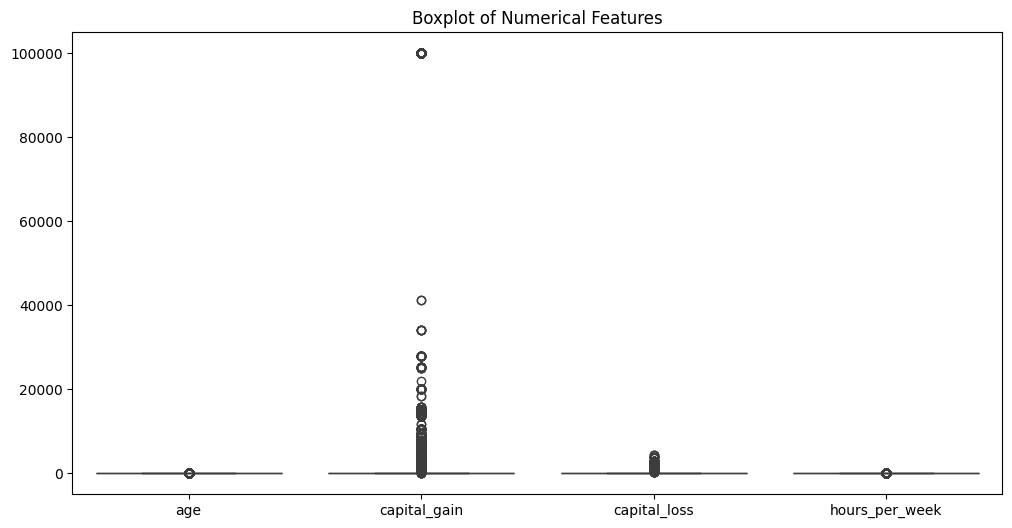

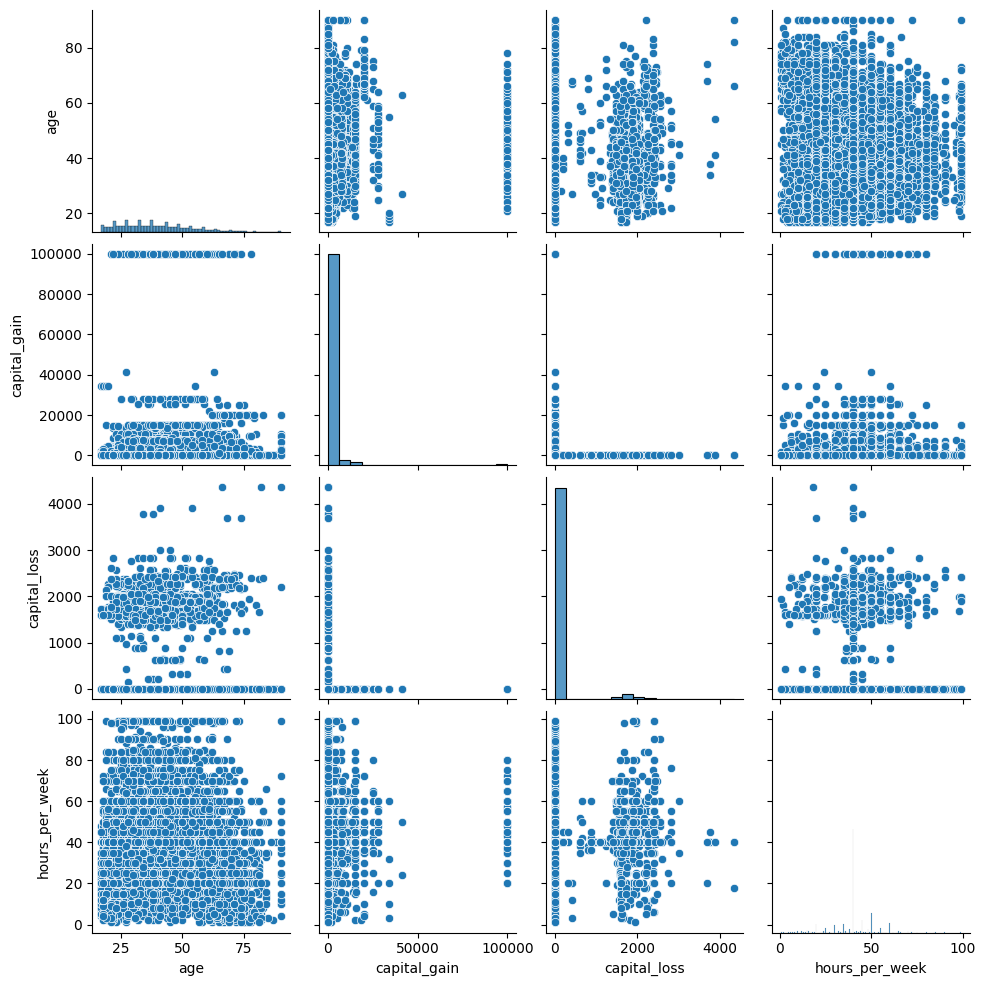

<ipython-input-3-49455ec8fee1>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')


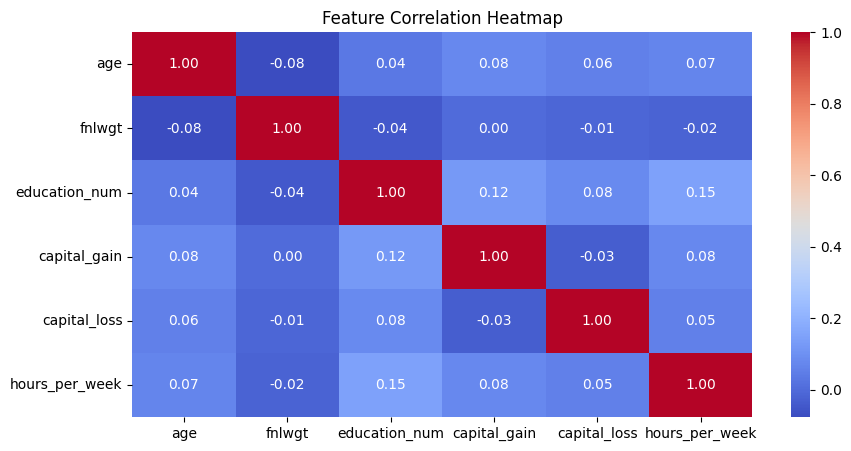

        x    y  ppscore
0     age  age      1.0
3150   23   23      1.0
1890   11   11      1.0
1995   12   12      1.0
2100   13   13      1.0
2205   14   14      1.0
2310   15   15      1.0
2415   16   16      1.0
2520   17   17      1.0
2625   18   18      1.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps

# Load the dataset
df = pd.read_csv("adult_with_headers.csv")

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])
plt.title("Boxplot of Numerical Features")
plt.show()

sns.pairplot(df[['age', 'capital_gain', 'capital_loss', 'hours_per_week']])
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Scaling
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
df_standard_scaled = scaler_standard.fit_transform(df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']])
df_minmax_scaled = scaler_minmax.fit_transform(df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']])

# Encoding
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])

ohe = OneHotEncoder(sparse_output=False, drop='first') # Replace 'sparse' with 'sparse_output'
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
df_encoded = pd.DataFrame(ohe.fit_transform(df[categorical_features]))
df = df.drop(columns=categorical_features).join(df_encoded)

# Feature Engineering
df['capital_difference'] = df['capital_gain'] - df['capital_loss']
df['work_hours_category'] = pd.cut(df['hours_per_week'], bins=[0, 20, 40, 60, 100], labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])

df['log_fnlwgt'] = np.log1p(df['fnlwgt'])

# Outlier Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
# Convert all column names to strings before fitting
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.columns = df_numeric.columns.astype(str)
outliers = iso_forest.fit_predict(df_numeric)

df['outlier'] = outliers
df = df[df['outlier'] == 1].drop(columns=['outlier'])

# PPS Score Analysis
pps_matrix = pps.matrix(df)
pps_matrix.sort_values(by='ppscore', ascending=False, inplace=True)
print(pps_matrix[['x', 'y', 'ppscore']].head(10))
